# Uncertainty and Statistical Significance

### PS 3 Week 6 Discussion - Clara Hu



-------

Today, we'll look at the data on final scores in a large undergraduate class where students were randomly assigned to attend tutoring. The midterm scores for all of the students in the course were recorded and participation in tutoring was noted. 

-------

**Data Dictionary/Codebook**

`Mentored`: `TRUE` = student participated in tutoring, `FALSE` = student did not participate in tutoring

`Final`: student score on final

--------


In [3]:
# Run this cell. 
library(estimatr)
set.seed(50)
scores <- read.csv("data/final_scores.csv")
head(scores)

,Mentored,Final
,<lgl>,<dbl>
1,FALSE,82
2,FALSE,82
3,FALSE,82
4,FALSE,82
5,FALSE,82
6,TRUE,82


## Uncertainty

How did students do on the Final? Since we have all of the data, I can just take the average of that column (we have all of the information, and this number is set). 

In [4]:
mean(scores$Final) # The average score was 62%

[1] 62.43841

In [5]:
sd(scores$Final) # Std Dev of scores was 25%

[1] 25.71275

Now, imagine that I am only able to get data for 30 students. I randomly sampled 30 students and asked them for the difference in their midterm scores. (We are treating the entire dataset/class as the population, and the 30 students as the sample. 

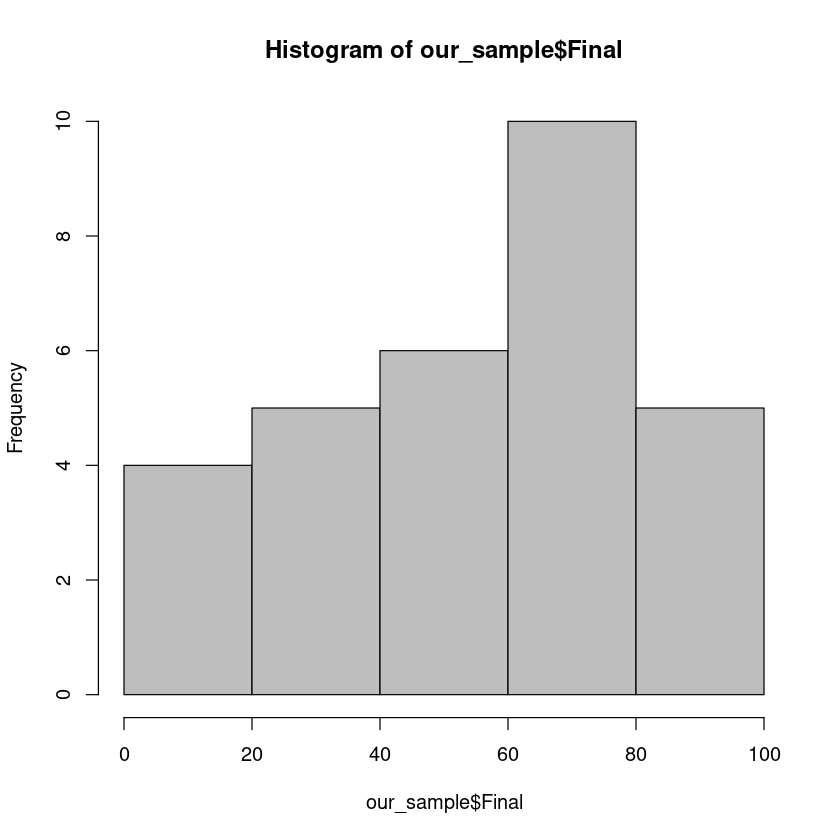

In [6]:
our_sample <- scores[sample(1:nrow(scores), 30, replace = FALSE),] # sample 30 students without replacement
hist(our_sample$Final, col = "gray")

In [7]:
# What's the standard deviation of the Difference for our 30 students?
sd(our_sample$Final)
# and the mean of 30 students:
mean(our_sample$Final)

[1] 24.70737

[1] 55.45

Compare this to the mean of all of the students in the dataset! 

If we did this 1000 times, what are all of the potential outcomes? Let's take a look at the first 10:

In [8]:
#Run this cell, you do not need to understand the code here
samples <- list()
sample_means <- array()

for(i in c(1:1000)){
    samples[i] <- list(scores[sample(1:nrow(scores), 30, replace = FALSE),]) # sample 30 students without replacement
    sample_means[i] <- mean(samples[[i]]$Final) # calculate their average score
}

head(sample_means, 10)

[1] 57.93333 67.16667 61.91667 59.53333 57.33333 62.95000 64.91667 60.96667
 [9] 63.83333 58.76667

In [9]:
# Here's the range of outcomes we got with 1000 different samples:
min(sample_means)
max(sample_means)

[1] 48.56667

[1] 79

**Uncertainty** is measured by the amount of error/noise in an estimate of the mean or average value.

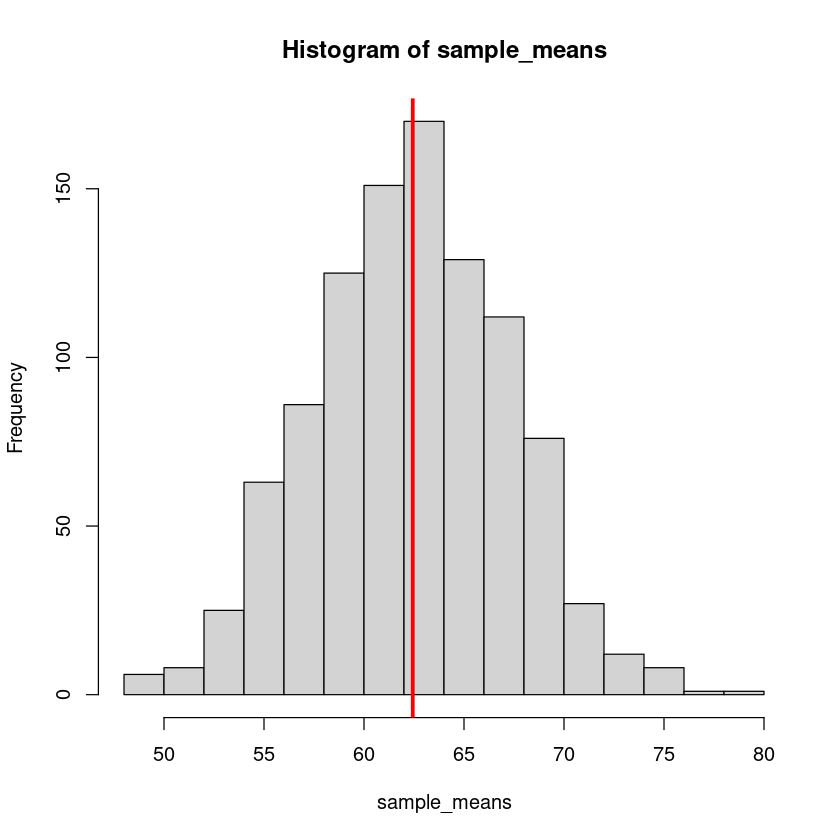

In [10]:
# In a graphical format
hist(sample_means)
abline(v = mean(scores$Final), col = "red", lwd = 3)

## Standard Error

What is the standard error of the samples above? Let's find the standard error using the first sample of Midterm 2 scores we took (`our_sample$MT2`).

Recall: `standard error  = standard deviation of the population / square root of the sample size`.  

$$SE = \frac{\sigma}{\sqrt{n}}$$

In [16]:
std_error = ... #mathematically calculate
std_error

[1] 4.694485

What does the value we got for the standard error tell us?

Let's compare our calculated standard error to the standard deviation of all of our sample means.   

In [11]:
# Standard error = standard deviation of the sample statistic
sd(sample_means)

[1] 4.838478

Notice the similarity between the two values.

## Statistical Significance

Back to our original question: Did receiving tutoring affect student performance on the Final? 

**Null Hypothesis:** Tutoring had no effect on Final Scores- scores for students who did not receive tutoring were the same as scores for students who did receive tutoring.  
**Alternative Hypothesis:** Tutoring did have an effect on Final Scores- scores for students who did not receive tutoring were different from scores for students who did receive tutoring.

### t- statistic

The t-statistic describes how likely an estimate of the size we saw would arise by chance even if there is no treatment effect.

Let's compare the average Final score for the students that were tutored in our sample of 30 students to the sample distribution of means if there were no treatment effect (not tutored).

In [12]:
#Finding the average Midterm 2 performance for the students that were tutored in our sample
mean_sample_tutored = mean(our_sample[our_sample$Mentored,]$Final)
mean_sample_tutored #our estimate from the sample

[1] 65.25

In [29]:
#Finding means Final score for students not tutored in samples
#Run this cell, you do not need to understand the code here

no_effect_means <- array() 
no_effect_scores <- numeric(0)
for(i in c(1:1000)){
    no_effect_means[i] <- mean(samples[[i]][!samples[[i]]$Mentored,]$Final)
    no_effect_scores = c(no_effect_scores, samples[[i]][!samples[[i]]$Mentored,]$Final)
#     samples[i] <- list(scores[sample(1:nrow(scores), 30, replace = FALSE),]) # sample 30 students without replacement
#     sample_means[i] <- mean(samples[[i]]$Difference) # calculate their average score
}

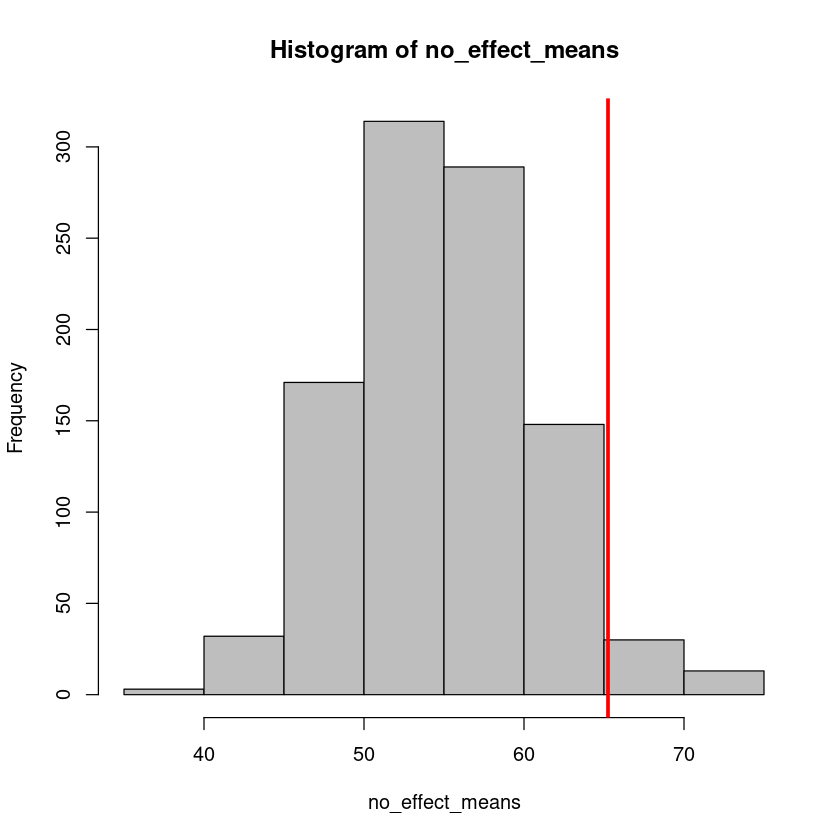

In [30]:
#Visualize our results
hist(no_effect_means, col = "gray")
abline(v = mean_sample_tutored, col = "red", lwd = 3)

**What does the histogram above tell us about the hypotheses?** 

Let's confirm by finding the t-statistic.

$$ t = \frac{estimate}{SE} $$

In [18]:
t_statistic = ...
t_statistic

[1] 13.89929

What does our t-statistic mean?

### Using the difference_in_means() function

Today's exercise so far was simply to show the statistical intuition behind statistical processes! In practice, we'll use the `difference_in_means()` function to calculate the effect, t-score, standard error, and p-value. 

In [23]:
difference_in_means(Final ~ Mentored, scores, condition1 = FALSE, condition2 = TRUE)

Design:  Standard 
         Estimate Std. Error  t value     Pr(>|t|) CI Lower CI Upper       DF
Mentored 18.70845   1.180301 15.85057 1.684749e-52 16.39327 21.02363 1526.994

**Let's interpret the results.** 

What is the treatment effect? Standard Error? t-statistic? p-value?

What do the t-statistic and p-value tell us about the treatment effect? Why? 

*Take notes here*